#Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Loading Dataset

In [2]:
#load the dataset
data =pd.read_csv("/content/netflix1 (1).csv")

# Display the first few rows of the dataset
data

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


#Exploring Data


In [3]:
#Initial inspestion
print("Initial Shape:", data.shape)
print("Initial Info:")
data.info()
print("Data types :")
data.dtypes

Initial Shape: (8790, 10)
Initial Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
Data types :


,0
show_id,object
type,object
title,object
director,object
country,object
date_added,object
release_year,int64
rating,object
duration,object
listed_in,object


#Data Cleaning

In [4]:
# Check for missing values
print(data.isnull().sum())

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [5]:
#Creating dataframe
df = pd.DataFrame(data)

#Finding duplicate values
duplicate = df[df.duplicated()]
print("Duplicate data :", duplicate)

Duplicate data : Empty DataFrame
Columns: [show_id, type, title, director, country, date_added, release_year, rating, duration, listed_in]
Index: []


In [6]:
#Handle missing values
missing_values = df.isnull().sum()
print("\nMissing values per column:\n", missing_values)


Missing values per column:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [7]:
# Dictionary to store counts of 'Not Given' per column
not_given_counts = {}

# Iterate through all columns
for col in df.columns:
    # Convert values to string (in case of numbers or NaNs), then compare
    count = df[col].astype(str).str.strip().str.lower().eq("not given").sum()
    not_given_counts[col] = count

# Display results
for column, count in not_given_counts.items():
    print(f"Column '{column}': {count} occurrence(s) of 'Not Given'")


Column 'show_id': 0 occurrence(s) of 'Not Given'
Column 'type': 0 occurrence(s) of 'Not Given'
Column 'title': 0 occurrence(s) of 'Not Given'
Column 'director': 2588 occurrence(s) of 'Not Given'
Column 'country': 287 occurrence(s) of 'Not Given'
Column 'date_added': 0 occurrence(s) of 'Not Given'
Column 'release_year': 0 occurrence(s) of 'Not Given'
Column 'rating': 0 occurrence(s) of 'Not Given'
Column 'duration': 0 occurrence(s) of 'Not Given'
Column 'listed_in': 0 occurrence(s) of 'Not Given'


In [8]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [9]:
# Split duration column into numeric and unit
split_duration = df['duration'].str.extract(r'(\d+)\s+(\w+)')
df['duration_int'] = pd.to_numeric(split_duration[0])
df['duration_unit'] = split_duration[1]

In [10]:
# Check cleaned data
print("\nCleaned Data Preview:\n")
df.head()


Cleaned Data Preview:



,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,duration_int,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,90,min
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,1,Season
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,1,Season
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,91,min
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,125,min


In [11]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,object
listed_in,object


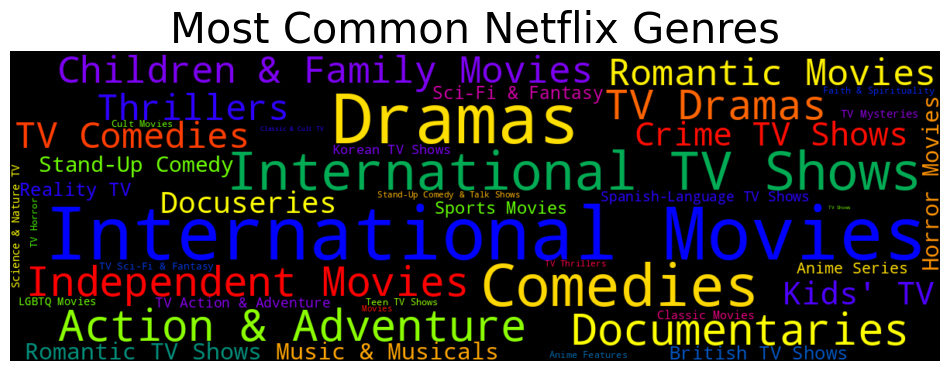

In [12]:
# Split genre strings by comma and flatten the list
all_genres = df['listed_in'].str.split(',').explode().str.strip()

# Count frequency of each genre
genre_freq = all_genres.value_counts()

# Create a WordCloud object
wordcloud = WordCloud(width=1200, height=400, background_color='black', colormap='prism').generate_from_frequencies(genre_freq)

# Plot the WordCloud
plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Netflix Genres', fontsize=30)
plt.show()


# Export Cleaned Data from Google Colab to CSV

In [13]:
# Save the DataFrame to CSV
df.to_csv('netflix_cleaned.csv', index=False)

In [14]:
# Download the CSV to local
from google.colab import files
files.download('netflix_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Re-export with clean formatting and double quotes
df.to_csv('netflix_clean_fixed.csv', index=False, quoting=1)
files.download('netflix_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>